In [760]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn import preprocessing
sns.set()

train = pd.read_csv('F:/fsociety/HACKATHONS/Datawiz/round 2/datawiz19round2/train.csv')
test = pd.read_csv('F:/fsociety/HACKATHONS/Datawiz/round 2/datawiz19round2/test.csv')

In [761]:
train.drop(['Id'],axis = 1 , inplace = True)
train.head(20)

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,employer_url,location,total_wages
0,Gujarat Forensic Sciences University,22879.56,291194.40,0.0,0.0,0.00,0.0,0.00,14-11-1968,Part-Time Seasonal and Temporary (PST) Retirem...,gfsu.edu.in,Gandhinagar,1614.00
1,Maharaja Sayajirao University of Baroda,22879.56,38749.56,0.0,0.0,596.85,NaN,0.00,26-02-1982,NaN,msubaroda.ac.in,Vadodara,596.85
2,Sardar Patel University,22879.56,38749.56,0.0,0.0,1040.13,0.0,0.00,18-08-1957,NaN,spuvvn.edu,Vallabh Vidhyanagar,1040.13
3,Dharamsinh Desai University,31200.00,48888.00,0.0,0.0,5399.60,NaN,9319.08,02-04-1971,2.00% @ 62,ddu.ac.in,NaN,37752.64
4,Dr. Babasaheb Ambedkar Open University,49512.00,66192.00,0.0,0.0,2697.00,0.0,0.00,27-04-1970,Part-Time Seasonal and Temporary (PST) Retirem...,baou.edu.in,Ahmedabad,21728.98
5,Gujarat Technological University,85188.00,150792.00,0.0,0.0,2000.00,0.0,17631.72,26-01-1958,2.00% @ 55,gtu.ac.in,Ahmedabad,95325.48
6,Bhakta Kavi Narsinh Mehta University,28079.40,41432.76,0.0,0.0,0.00,NaN,0.00,14-09-1954,NaN,www.bknmu.edu.in,Junagadh,604.50
7,Sardar Patel University,22879.56,38749.56,0.0,0.0,178.50,0.0,0.00,06-08-1962,NaN,spuvvn.edu,Vallabh Vidhyanagar,178.50
8,Gujarat University,22879.56,38749.56,0.0,0.0,1435.50,0.0,0.00,08-06-1976,NaN,gujaratuniversity.org.in,Ahmedabad,1435.50
9,Bhakta Kavi Narsinh Mehta University,22879.56,38749.56,0.0,0.0,3551.78,NaN,0.00,21-04-1969,NaN,www.bknmu.edu.in,Junagadh,3551.78


In [762]:
train.shape

(23000, 13)

In [763]:
train['total_wages'].describe()

count     23000.000000
mean      29340.582857
std       38796.696712
min           0.920000
25%        2127.780000
50%        8197.740000
75%       50204.580000
max      427792.120000
Name: total_wages, dtype: float64

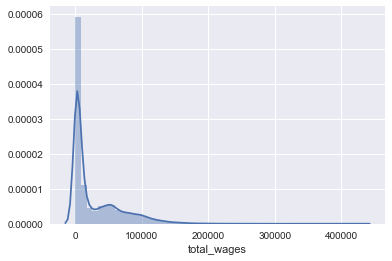

In [764]:
#histogram
sns.distplot(train['total_wages'])

In [765]:
#skewness and kurtosis
print("Skewness: %f" % train['total_wages'].skew())
print("Kurtosis: %f" % train['total_wages'].kurt())

Skewness: 1.771369
Kurtosis: 4.336737


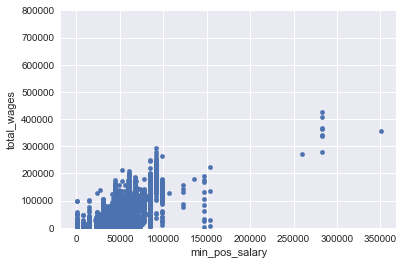

In [766]:
#scatter plot min_sal/total_wages
var = 'min_pos_salary'
data = pd.concat([train['total_wages'], train[var]], axis=1)
data.plot.scatter(x=var, y='total_wages', ylim=(0,800000));

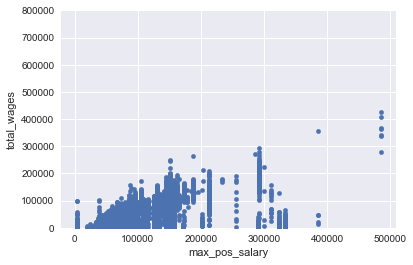

In [767]:
#scatter plot max_sal/total_wages
var = 'max_pos_salary'
data = pd.concat([train['total_wages'], train[var]], axis=1)
data.plot.scatter(x=var, y='total_wages', ylim=(0,800000));

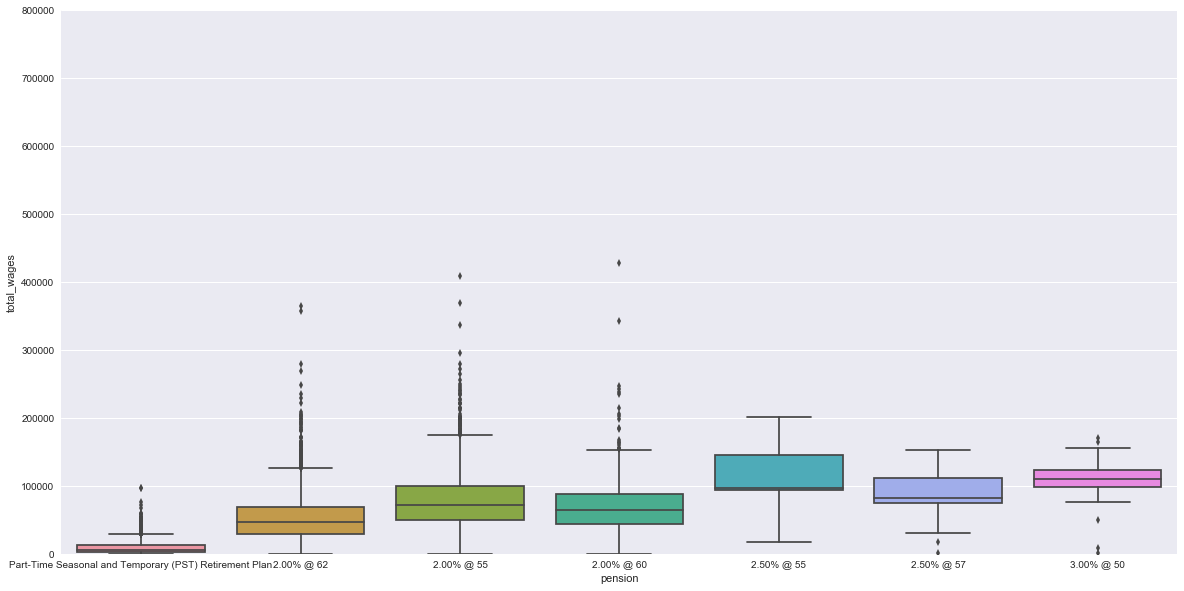

In [768]:
#categorical features
var = 'pension'
data = pd.concat([train['total_wages'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10 ))
fig = sns.boxplot(x=var, y="total_wages", data=data)
fig.axis(ymin=0, ymax=800000);

In [769]:
#Less no of people pst
#many outliers especially for 2@55
#liner relationship
#types of pension not 3

### for categorical data

In [770]:
#var = 'DOB'
#data = pd.concat([train['total_wages'], train[var]], axis=1)
#f, ax = plt.subplots(figsize=(16, 8))
#fig = sns.boxplot(x=var, y="total_wages", data=data)
#fig.axis(ymin=0, ymax=800000);
#plt.xticks(rotation=90);

### Heat maps

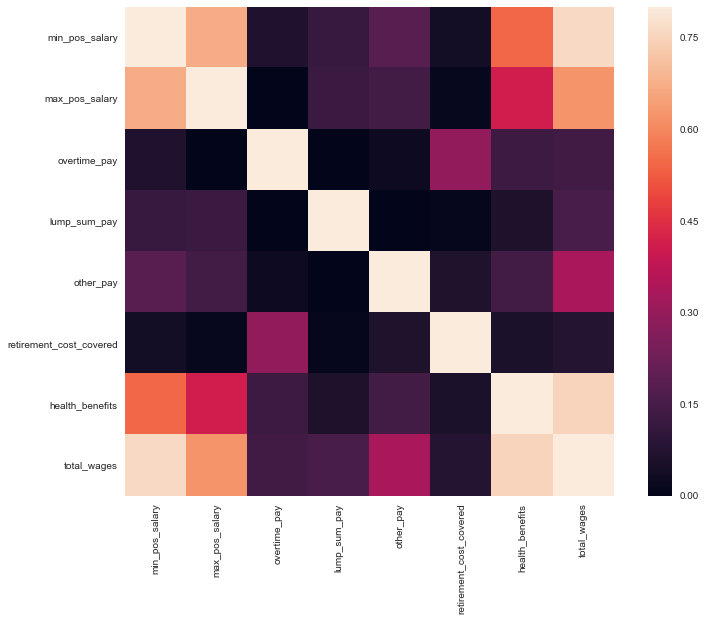

In [771]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


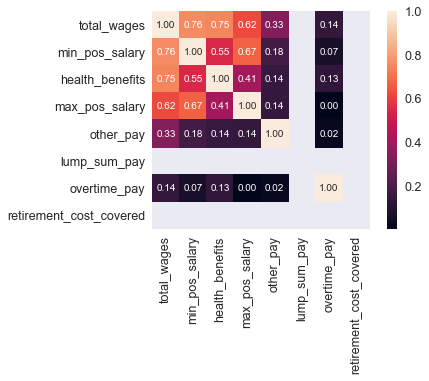

In [772]:
#total_wages correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'total_wages')['total_wages'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [773]:
#min pos sal and max pos sal almost same ...thy arae mutually co related...drop one/actuallau not...

### Scatter plot of co related var

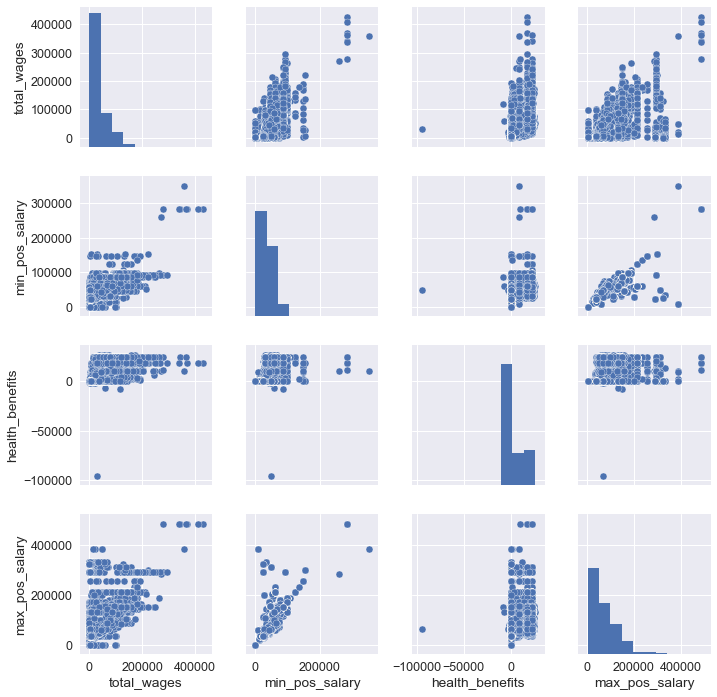

In [774]:
cols = ['total_wages', 'min_pos_salary', 'health_benefits', 'max_pos_salary']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [775]:
#min pos sal max pos sal lin relation ship
#neg health benefit bhi hai

### Missing Data

In [776]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
pension,10556,0.458957
retirement_cost_covered,10095,0.438913
location,6195,0.269348
lump_sum_pay,2558,0.111217
total_wages,0,0.000000
employer_url,0,0.000000
DOB,0,0.000000
health_benefits,0,0.000000
other_pay,0,0.000000
overtime_pay,0,0.000000


In [777]:
#just del missing data
#train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
#train.isnull().sum().max() #just checking that there's no missing data missing...
#train = train.drop(train.loc[train['____'].isnull()].index)   ....del only that row


train.drop(['employer_url'],axis = 1 , inplace = True)


In [778]:
from datetime import datetime
train['DOB'] = pd.to_datetime(train.DOB)
#train['month'] = train['DOB'].dt.month
#train['dayofweek'] = train['DOB'].dt.dayofweek

train['year'] = train['DOB'].dt.year
#train['day'] = train['DOB'].dt.day
train['dayofyear'] = train['DOB'].dt.dayofyear
#train['weekofyear'] = train['DOB'].dt.weekofyear

In [779]:
train['pension']=train['pension'].str.split(expand=True)

In [780]:
train['lump_sum_pay']=train['lump_sum_pay'].fillna(0)
train['location'] = train['location'].fillna('Ahmedabad')
train['retirement_cost_covered'] = train['retirement_cost_covered'].fillna(0)
train['pension'] = train['pension'].fillna('2.00%')

In [781]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder_X = LabelEncoder()
train['employer'] = labelencoder_X.fit_transform(train['employer'])
#train['employer_url'] = labelencoder_X.fit_transform(train['employer_url'])
train['location'] = labelencoder_X.fit_transform(train['location'])
train['pension'] = labelencoder_X.fit_transform(train['pension'])

#label encoder of pension is still not precise there are more than 3 categories

In [782]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear
0,6,22879.56,291194.40,0.0,0.0,0.00,0.0,0.00,1968-11-14,3,4,1614.00,1968,319
1,15,22879.56,38749.56,0.0,0.0,596.85,0.0,0.00,1982-02-26,0,15,596.85,1982,57
2,18,22879.56,38749.56,0.0,0.0,1040.13,0.0,0.00,1957-08-18,0,16,1040.13,1957,230
3,2,31200.00,48888.00,0.0,0.0,5399.60,0.0,9319.08,1971-02-04,0,0,37752.64,1971,35
4,3,49512.00,66192.00,0.0,0.0,2697.00,0.0,0.00,1970-04-27,3,0,21728.98,1970,117


In [783]:
# Fill missing values in Age with a specific value
#value = 1000
#train['Age'].fillna(1000, inplace=True)
#df['Age'].max()

### Outliers

In [784]:
#standardizing data
total_wages_scaled = StandardScaler().fit_transform(train['total_wages'][:,np.newaxis]);
low_range = total_wages_scaled[total_wages_scaled[:,0].argsort()][:10]
high_range= total_wages_scaled[total_wages_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.7562577 ]
 [-0.75622419]
 [-0.7562211 ]
 [-0.75617857]
 [-0.75617058]
 [-0.75615279]
 [-0.7561363 ]
 [-0.75611903]
 [-0.75609609]
 [-0.75608268]]

outer range (high) of the distribution:
[[ 6.43010312]
 [ 6.44774005]
 [ 6.85001243]
 [ 7.92704738]
 [ 8.08980859]
 [ 8.46123437]
 [ 8.62981114]
 [ 8.74477343]
 [ 9.78392959]
 [10.27046716]]


In [785]:
#train.head()

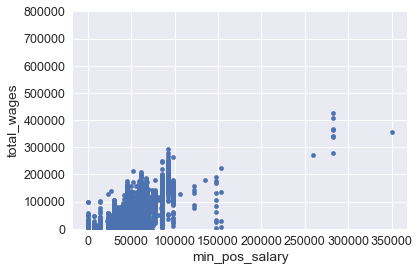

In [786]:
var = 'min_pos_salary'
data = pd.concat([train['total_wages'], train[var]], axis=1)
data.plot.scatter(x=var, y='total_wages', ylim=(0,800000));

In [787]:
#delete if ness
#check others

### Normalization

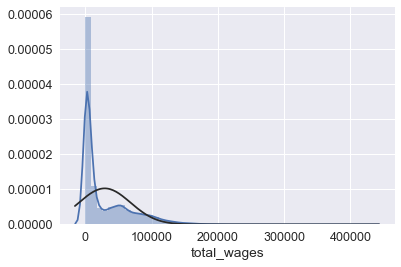

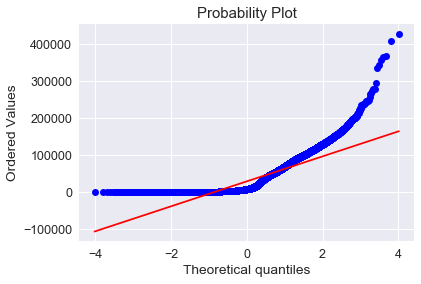

In [788]:
#histogram and normal probability plot
sns.distplot(train['total_wages'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['total_wages'], plot=plt)


In [789]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear
0,6,22879.56,291194.40,0.0,0.0,0.00,0.0,0.00,1968-11-14,3,4,1614.00,1968,319
1,15,22879.56,38749.56,0.0,0.0,596.85,0.0,0.00,1982-02-26,0,15,596.85,1982,57
2,18,22879.56,38749.56,0.0,0.0,1040.13,0.0,0.00,1957-08-18,0,16,1040.13,1957,230
3,2,31200.00,48888.00,0.0,0.0,5399.60,0.0,9319.08,1971-02-04,0,0,37752.64,1971,35
4,3,49512.00,66192.00,0.0,0.0,2697.00,0.0,0.00,1970-04-27,3,0,21728.98,1970,117


In [790]:
#applying log transformation
train['total_wages'] = np.log(train['total_wages'])

In [791]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear
0,6,22879.56,291194.40,0.0,0.0,0.00,0.0,0.00,1968-11-14,3,4,7.386471,1968,319
1,15,22879.56,38749.56,0.0,0.0,596.85,0.0,0.00,1982-02-26,0,15,6.391666,1982,57
2,18,22879.56,38749.56,0.0,0.0,1040.13,0.0,0.00,1957-08-18,0,16,6.947101,1957,230
3,2,31200.00,48888.00,0.0,0.0,5399.60,0.0,9319.08,1971-02-04,0,0,10.538811,1971,35
4,3,49512.00,66192.00,0.0,0.0,2697.00,0.0,0.00,1970-04-27,3,0,9.986402,1970,117


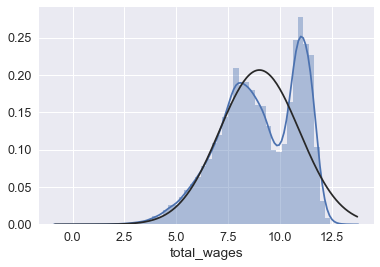

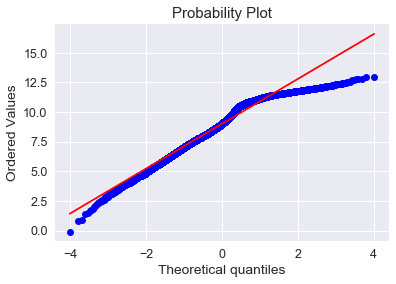

In [792]:
#transformed histogram and normal probability plot
sns.distplot(train['total_wages'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['total_wages'], plot=plt)

In [793]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear
0,6,22879.56,291194.40,0.0,0.0,0.00,0.0,0.00,1968-11-14,3,4,7.386471,1968,319
1,15,22879.56,38749.56,0.0,0.0,596.85,0.0,0.00,1982-02-26,0,15,6.391666,1982,57
2,18,22879.56,38749.56,0.0,0.0,1040.13,0.0,0.00,1957-08-18,0,16,6.947101,1957,230
3,2,31200.00,48888.00,0.0,0.0,5399.60,0.0,9319.08,1971-02-04,0,0,10.538811,1971,35
4,3,49512.00,66192.00,0.0,0.0,2697.00,0.0,0.00,1970-04-27,3,0,9.986402,1970,117


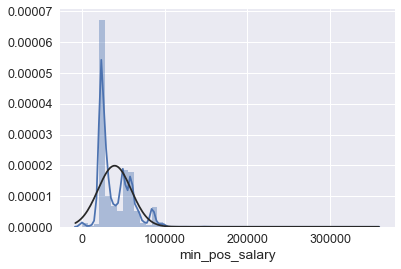

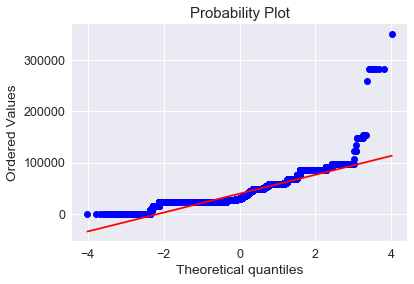

In [794]:
#histogram and normal probability plot
sns.distplot(train['min_pos_salary'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['min_pos_salary'], plot=plt)

In [795]:
train['min_pos_salary'] = np.log(train['min_pos_salary'])
train['max_pos_salary'] = np.log(train['max_pos_salary'])
train['overtime_pay'] = np.log(train['overtime_pay'])
train['other_pay'] = np.log(train['other_pay'])
train['health_benefits'] = np.log(train['health_benefits'])


In [796]:
train.head()

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear
0,6,10.037999,12.581746,-inf,0.0,-inf,0.0,-inf,1968-11-14,3,4,7.386471,1968,319
1,15,10.037999,10.564875,-inf,0.0,6.391666,0.0,-inf,1982-02-26,0,15,6.391666,1982,57
2,18,10.037999,10.564875,-inf,0.0,6.947101,0.0,-inf,1957-08-18,0,16,6.947101,1957,230
3,2,10.348173,10.797287,-inf,0.0,8.594080,0.0,9.139819,1971-02-04,0,0,10.538811,1971,35
4,3,10.809970,11.100315,-inf,0.0,7.899895,0.0,-inf,1970-04-27,3,0,9.986402,1970,117


In [797]:

#ABOVE FILL IN THE MISSING VALUES

In [798]:
#sns.distplot(train['overtime_pay'], fit=norm);
#fig = plt.figure()
#res = stats.probplot(train['overtime_pay'], plot=plt)


#need to work on missing data NAN

In [799]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
train['HAS_overtime_pay'] = pd.Series(len(train['overtime_pay']), index=train.index)
train['HAS_overtime_pay'] = 0 
train.loc[train['overtime_pay']>0,'HAS_overtime_pay'] = 1

train.loc[train['HAS_overtime_pay']==1,'overtime_pay'] = np.log(train['overtime_pay'])


In [800]:
train.head(11)

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear,HAS_overtime_pay
0,6,10.037999,12.581746,-inf,0.0,-inf,0.0,-inf,1968-11-14,3,4,7.386471,1968,319,0
1,15,10.037999,10.564875,-inf,0.0,6.391666,0.0,-inf,1982-02-26,0,15,6.391666,1982,57,0
2,18,10.037999,10.564875,-inf,0.0,6.947101,0.0,-inf,1957-08-18,0,16,6.947101,1957,230,0
3,2,10.348173,10.797287,-inf,0.0,8.594080,0.0,9.139819,1971-02-04,0,0,10.538811,1971,35,0
4,3,10.809970,11.100315,-inf,0.0,7.899895,0.0,-inf,1970-04-27,3,0,9.986402,1970,117,0
5,8,11.352616,11.923657,-inf,0.0,7.600902,0.0,9.777455,1958-01-26,0,0,11.465052,1958,26,0
6,1,10.242791,10.631827,-inf,0.0,-inf,0.0,-inf,1954-09-14,0,7,6.404402,1954,257,0
7,18,10.037999,10.564875,-inf,0.0,5.184589,0.0,-inf,1962-06-08,0,16,5.184589,1962,159,0
8,9,10.037999,10.564875,-inf,0.0,7.269268,0.0,-inf,1976-08-06,0,0,7.269268,1976,219,0
9,1,10.037999,10.564875,-inf,0.0,8.175204,0.0,-inf,1969-04-21,0,7,8.175204,1969,111,0


In [801]:
train['HAS_health_benefits'] = pd.Series(len(train['health_benefits']), index=train.index)
train['HAS_health_benefits'] = 0 
train.loc[train['health_benefits']>0,'HAS_health_benefits'] = 1

train.loc[train['HAS_health_benefits']==1,'health_benefits'] = np.log(train['health_benefits'])


In [802]:
train['HAS_other_pay'] = pd.Series(len(train['other_pay']), index=train.index)
train['HAS_other_pay'] = 0 
train.loc[train['other_pay']>0,'HAS_other_pay'] = 1

train.loc[train['HAS_other_pay']==1,'other_pay'] = np.log(train['other_pay'])


### Checking

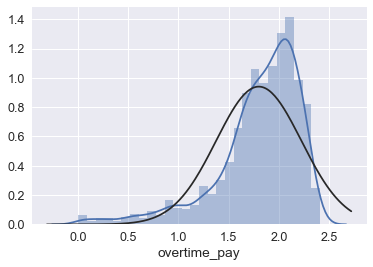

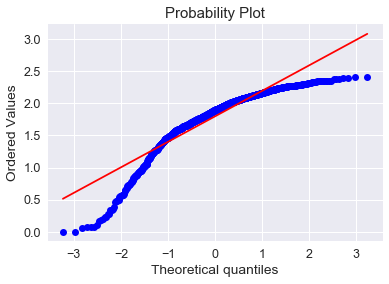

In [803]:
#histogram and normal probability plot
sns.distplot(train[train['overtime_pay']>0]['overtime_pay'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['overtime_pay']>0]['overtime_pay'], plot=plt)

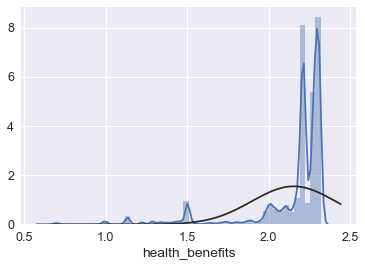

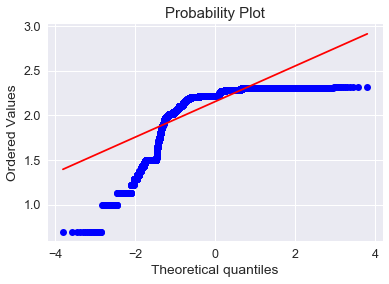

In [804]:
#histogram and normal probability plot
sns.distplot(train[train['health_benefits']>0]['health_benefits'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['health_benefits']>0]['health_benefits'], plot=plt)

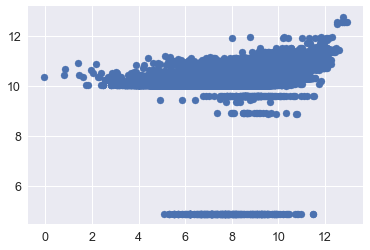

In [805]:
#checking now data is normalized
plt.scatter(train['total_wages'], train['min_pos_salary'])


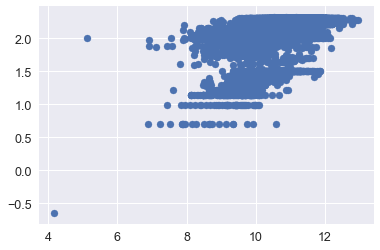

In [806]:
plt.scatter(train['total_wages'], train['health_benefits'])

In [807]:
train.head(11)

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,DOB,pension,location,total_wages,year,dayofyear,HAS_overtime_pay,HAS_health_benefits,HAS_other_pay
0,6,10.037999,12.581746,-inf,0.0,-inf,0.0,-inf,1968-11-14,3,4,7.386471,1968,319,0,0,0
1,15,10.037999,10.564875,-inf,0.0,1.854995,0.0,-inf,1982-02-26,0,15,6.391666,1982,57,0,0,1
2,18,10.037999,10.564875,-inf,0.0,1.938324,0.0,-inf,1957-08-18,0,16,6.947101,1957,230,0,0,1
3,2,10.348173,10.797287,-inf,0.0,2.151074,0.0,2.212641,1971-02-04,0,0,10.538811,1971,35,0,1,1
4,3,10.809970,11.100315,-inf,0.0,2.066850,0.0,-inf,1970-04-27,3,0,9.986402,1970,117,0,0,1
5,8,11.352616,11.923657,-inf,0.0,2.028267,0.0,2.280079,1958-01-26,0,0,11.465052,1958,26,0,1,1
6,1,10.242791,10.631827,-inf,0.0,-inf,0.0,-inf,1954-09-14,0,7,6.404402,1954,257,0,0,0
7,18,10.037999,10.564875,-inf,0.0,1.645690,0.0,-inf,1962-06-08,0,16,5.184589,1962,159,0,0,1
8,9,10.037999,10.564875,-inf,0.0,1.983656,0.0,-inf,1976-08-06,0,0,7.269268,1976,219,0,0,1
9,1,10.037999,10.564875,-inf,0.0,2.101106,0.0,-inf,1969-04-21,0,7,8.175204,1969,111,0,0,1


### Dummies

In [808]:
#convert categorical variable into dummy
train.drop(['DOB'] , axis = 1 , inplace = True)
train = pd.get_dummies(train)

In [809]:
train.head(11)

,employer,min_pos_salary,max_pos_salary,overtime_pay,lump_sum_pay,other_pay,retirement_cost_covered,health_benefits,pension,location,total_wages,year,dayofyear,HAS_overtime_pay,HAS_health_benefits,HAS_other_pay
0,6,10.037999,12.581746,-inf,0.0,-inf,0.0,-inf,3,4,7.386471,1968,319,0,0,0
1,15,10.037999,10.564875,-inf,0.0,1.854995,0.0,-inf,0,15,6.391666,1982,57,0,0,1
2,18,10.037999,10.564875,-inf,0.0,1.938324,0.0,-inf,0,16,6.947101,1957,230,0,0,1
3,2,10.348173,10.797287,-inf,0.0,2.151074,0.0,2.212641,0,0,10.538811,1971,35,0,1,1
4,3,10.809970,11.100315,-inf,0.0,2.066850,0.0,-inf,3,0,9.986402,1970,117,0,0,1
5,8,11.352616,11.923657,-inf,0.0,2.028267,0.0,2.280079,0,0,11.465052,1958,26,0,1,1
6,1,10.242791,10.631827,-inf,0.0,-inf,0.0,-inf,0,7,6.404402,1954,257,0,0,0
7,18,10.037999,10.564875,-inf,0.0,1.645690,0.0,-inf,0,16,5.184589,1962,159,0,0,1
8,9,10.037999,10.564875,-inf,0.0,1.983656,0.0,-inf,0,0,7.269268,1976,219,0,0,1
9,1,10.037999,10.564875,-inf,0.0,2.101106,0.0,-inf,0,7,8.175204,1969,111,0,0,1


In [810]:
train.shape

(23000, 16)

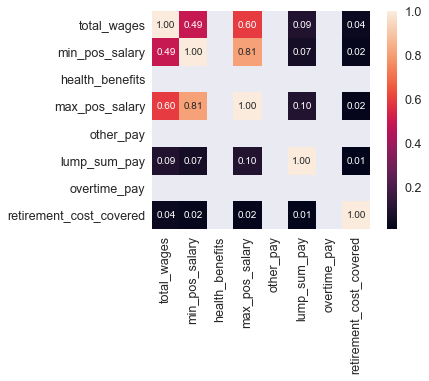

In [811]:
#total_wages correlation matrix
k = 16 #number of variables for heatmap
cols = corrmat.nlargest(k, 'total_wages')['total_wages'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Train Test

In [813]:
y = train["total_wages"]
X = train.drop(["total_wages"],axis=1)

In [814]:
from sklearn.model_selection import train_test_split 
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0) #stdsca,esti,fulltrain,algo